# Web Scraping and Vizualization
### Data Scraping is a technique to retrieve large amounts of data from the internet.

### Libraries used for Web Scraping-
#### BeautifulSoup: 
Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that are helpful to extract the data easily.
#### Pandas: 
Pandas is a library used for data manipulation and analysis. It is used to extract the data and store it in the desired format.
#### Use matplotlib and seaborn for data visualization

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#extracting the laptop data from flipkart(India)
def extract(page):
    url = f'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={page}'
    #Adding the {page} so we can get 'n' number of pages for that perticular search i.e all n pages for laptop on this site
    #headers = {'User-Agent' :'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

### Error while extracting the data
#### The AttributeError: 
'NoneType' object has no attribute 'text' error occurs when you try to access the text attribute of a None object. This means that the find() method did not find a matching element in the HTML and returned None.

To handle this error, you can add a conditional check to ensure that the element is found before accessing its text attribute. Here's an updated version of the code that includes the check:

In [3]:
import re
#This code gets the the values that we want to fetch from the website
def transform(soup):
    divs = soup.find_all('a', class_ = '_1fQZEK')

    for item in divs:
        title = item.find('div', class_='_4rR01T').text.strip()
        price = item.find('div', class_='_30jeq3 _1_WHN1').text.replace('₹', '').strip()
        rating_div = item.find('div', class_='_3LWZlK')
        if rating_div is not None:
            rating = rating_div.text.strip()
            rating = re.sub(r'<.*?>', '', rating)  # Remove any HTML tags within the rating
        else:
            rating = None
    #print(title, price, rating)

    
        laptop_info = {
            'title': title,
            'price': price,
            'rating':rating
        }
        laptop_list.append(laptop_info)
    return

In [5]:
laptop_list = []

#fetching first 10 pages
for i in range(10):
    c = extract(i)
    transform(c)


df = pd.DataFrame(laptop_list)
print(df.head())
df.to_csv('laptop_list.csv', index = False, encoding = 'utf-8')

                                               title   price rating
0  HP Chromebook (2023) Intel Core i5 11th Gen - ...  40,990   None
1  HP Pavilion Intel Core i5 12th Gen - (16 GB/51...  65,990    4.3
2  HP 15s (2023) Ryzen 3 Dual Core 3250U - (8 GB/...  29,990    4.1
3  ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...  52,990    4.3
4  realme Book (Slim) Core i3 11th Gen - (8 GB/25...  31,999   None


# Explorartory Data Analysis(EDA) & Data Visualization

In [89]:
#importing the csv file
laptop_df = pd.read_csv('./laptop_list.csv', sep = None, thousands=',',engine='python')#loading csv removing , from price

In [90]:
laptop_df.head()

,title,price,rating
0,HP Chromebook (2023) Intel Core i5 11th Gen - ...,40990,NaN
1,HP Pavilion Intel Core i5 12th Gen - (16 GB/51...,65990,4.3
2,HP 15s (2023) Ryzen 3 Dual Core 3250U - (8 GB/...,29990,4.1
3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,52990,4.3
4,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,31999,NaN


In [91]:
laptop_df.shape

(240, 3)

In [92]:
laptop_df.dtypes

title      object
price       int64
rating    float64
dtype: object

In [93]:
#split the title(model-specifications) seperated by '-' 
laptop_df['model'],laptop_df['spec']=laptop_df['title'].str.split(' - ',1).str
del laptop_df['title']
laptop_df.head()

/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/3737907350.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['model'],laptop_df['spec']=laptop_df['title'].str.split(' - ',1).str
/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/3737907350.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'],laptop_df['spec']=laptop_df['title'].str.split(' - ',1).str


,price,rating,model,spec
0,40990,NaN,HP Chromebook (2023) Intel Core i5 11th Gen,(8 GB/256 GB SSD/Chrome OS) 14c-cc0010TU Chrom...
1,65990,4.3,HP Pavilion Intel Core i5 12th Gen,(16 GB/512 GB SSD/Windows 11 Home) 14-dv2014TU...
2,29990,4.1,HP 15s (2023) Ryzen 3 Dual Core 3250U,(8 GB/512 GB SSD/Windows 11 Home) 15s- eq1580A...
3,52990,4.3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,(8 GB/1 TB SSD/Windows 11 Home/4 GB Graphics/N...
4,31999,NaN,realme Book (Slim) Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thi...


In [94]:
laptop_df['spec'] = laptop_df['spec'].str.replace('(', '')
laptop_df['spec'] = laptop_df['spec'].str.replace(')', '/')
laptop_df.head()

/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/61831687.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  laptop_df['spec'] = laptop_df['spec'].str.replace('(', '')
/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/61831687.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  laptop_df['spec'] = laptop_df['spec'].str.replace(')', '/')


,price,rating,model,spec
0,40990,NaN,HP Chromebook (2023) Intel Core i5 11th Gen,8 GB/256 GB SSD/Chrome OS/ 14c-cc0010TU Chrome...
1,65990,4.3,HP Pavilion Intel Core i5 12th Gen,16 GB/512 GB SSD/Windows 11 Home/ 14-dv2014TU ...
2,29990,4.1,HP 15s (2023) Ryzen 3 Dual Core 3250U,8 GB/512 GB SSD/Windows 11 Home/ 15s- eq1580AU...
3,52990,4.3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,8 GB/1 TB SSD/Windows 11 Home/4 GB Graphics/NV...
4,31999,NaN,realme Book (Slim) Core i3 11th Gen,8 GB/256 GB SSD/Windows 10 Home/ RMNB1001 Thin...


In [95]:
# Getting some features from the spec like RAM, Storage, OS and graphic card
laptop_df['RAM'],laptop_df['Hard disk']=laptop_df['spec'].str.split('/',1).str
del laptop_df['spec']
laptop_df.head()

/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/2894110531.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['RAM'],laptop_df['Hard disk']=laptop_df['spec'].str.split('/',1).str
/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/2894110531.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'],laptop_df['Hard disk']=laptop_df['spec'].str.split('/',1).str


,price,rating,model,RAM,Hard disk
0,40990,NaN,HP Chromebook (2023) Intel Core i5 11th Gen,8 GB,256 GB SSD/Chrome OS/ 14c-cc0010TU Chromebook
1,65990,4.3,HP Pavilion Intel Core i5 12th Gen,16 GB,512 GB SSD/Windows 11 Home/ 14-dv2014TU Thin a...
2,29990,4.1,HP 15s (2023) Ryzen 3 Dual Core 3250U,8 GB,512 GB SSD/Windows 11 Home/ 15s- eq1580AU Thin...
3,52990,4.3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,8 GB,1 TB SSD/Windows 11 Home/4 GB Graphics/NVID...
4,31999,NaN,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home/ RMNB1001 Thin and ...


In [96]:
laptop_df['Storage'],laptop_df['OS']=laptop_df['Hard disk'].str.split('/',1).str
del laptop_df['Hard disk']
laptop_df.head()

/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/1355666997.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['Storage'],laptop_df['OS']=laptop_df['Hard disk'].str.split('/',1).str
/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/1355666997.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'],laptop_df['OS']=laptop_df['Hard disk'].str.split('/',1).str


,price,rating,model,RAM,Storage,OS
0,40990,NaN,HP Chromebook (2023) Intel Core i5 11th Gen,8 GB,256 GB SSD,Chrome OS/ 14c-cc0010TU Chromebook
1,65990,4.3,HP Pavilion Intel Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home/ 14-dv2014TU Thin and Light La...
2,29990,4.1,HP 15s (2023) Ryzen 3 Dual Core 3250U,8 GB,512 GB SSD,Windows 11 Home/ 15s- eq1580AU Thin and Light...
3,52990,4.3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,8 GB,1 TB SSD,Windows 11 Home/4 GB Graphics/NVID...
4,31999,NaN,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home/ RMNB1001 Thin and Light Laptop


In [97]:

laptop_df['Operating System'],laptop_df['extra']=laptop_df['OS'].str.split('/',1).str
del laptop_df['OS']
laptop_df.head()

/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/1003951466.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptop_df['Operating System'],laptop_df['extra']=laptop_df['OS'].str.split('/',1).str
/var/folders/vc/sqz86wd54r3bw7q55_4mczhh0000gn/T/ipykernel_10065/1003951466.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Operating System'],laptop_df['extra']=laptop_df['OS'].str.split('/',1).str


,price,rating,model,RAM,Storage,Operating System,extra
0,40990,NaN,HP Chromebook (2023) Intel Core i5 11th Gen,8 GB,256 GB SSD,Chrome OS,14c-cc0010TU Chromebook
1,65990,4.3,HP Pavilion Intel Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home,14-dv2014TU Thin and Light Lap...
2,29990,4.1,HP 15s (2023) Ryzen 3 Dual Core 3250U,8 GB,512 GB SSD,Windows 11 Home,15s- eq1580AU Thin and Light...
3,52990,4.3,ASUS TUF Gaming A15 Ryzen 5 Hexa Core AMD R5-4...,8 GB,1 TB SSD,Windows 11 Home,4 GB Graphics/NVID...
4,31999,NaN,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home,RMNB1001 Thin and Light Laptop


In [106]:
laptop_df.isnull().sum()

price                0
rating              70
model                0
RAM                  0
Storage              0
Operating System     0
extra                7
dtype: int64

In [111]:
laptop_df.to_csv('laptops.csv', index = False, encoding = 'utf-8')

In [99]:
laptop_df['model'].nunique()

128

In [100]:
laptop_df['model'].value_counts()

ASUS Chromebook Touch Intel Celeron Dual Core                                        10
ASUS Vivobook 15 Core i3 11th Gen                                                    10
HP 15s (2023) Athlon Dual Core 3050U                                                  9
Primebook 4G Android Based MediaTek MT8788                                            9
ASUS Vivobook 15 Core i5 11th Gen                                                     7
                                                                                     ..
ASUS Vivobook Go 15 (2023) Ryzen 3 Quad Core 7320U                                    1
Lenovo IdeaPad Ryzen 5 Hexa Core 5500U                                                1
HP Pavilion (2023) Eyesafe Ryzen 5 Hexa Core 5625U                                    1
Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core 5600H                                   1
ASUS ROG Strix SCAR 16 (2023) with 90WHr Battery Intel HX-Series Core i9 13th Gen     1
Name: model, Length: 128, dtype:

In [101]:
laptop_df.describe()

,price,rating
count,240.000000,170.000000
mean,59250.329167,4.207647
std,61614.695380,0.264240
min,12990.000000,3.000000
25%,34990.000000,4.100000
50%,45990.000000,4.200000
75%,63990.000000,4.300000
max,599990.000000,5.000000


In [102]:
laptop_df.dtypes

price                 int64
rating              float64
model                object
RAM                  object
Storage              object
Operating System     object
extra                object
dtype: object

In [103]:
#Index of the columns
laptop_df.index

RangeIndex(start=0, stop=240, step=1)

In [104]:
laptop_df.columns

Index(['price', 'rating', 'model', 'RAM', 'Storage', 'Operating System',
       'extra'],
      dtype='object')

In [107]:
#Laptop with rating >= 4.5 and within the range of 40,000 and 60,000
laptop_df[(laptop_df['price']>=40000) & (laptop_df['price']<=60000) & (laptop_df['rating']>=4.5)]

,price,rating,model,RAM,Storage,Operating System,extra
12,51990,4.5,MSI Bravo 15 Ryzen 7 Octa Core 5800H,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/AMD Radeon RX650...
36,51990,4.5,MSI Bravo 15 Ryzen 7 Octa Core 5800H,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics/AMD Radeon RX650...
142,55990,4.5,ASUS Vivobook 16 (2023) Ryzen 5 Hexa Core 7530U,16 GB,512 GB SSD,Windows 11 Home,M1605YA-MB541WS L...


In [110]:
#Laptop with rating >= 3 and price <= 20000
laptop_df[(laptop_df['price']<=20000) & (laptop_df['rating']>=4)]

,price,rating,model,RAM,Storage,Operating System,extra
44,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
104,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
121,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
134,12990,4.1,Primebook 4G Android Based MediaTek MT8788,4 GB,64 GB EMMC Storage,Prime OS,4G Thin and Light Lapt...
160,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
163,14990,4.3,ASUS EeeBook 12 Celeron Dual Core,4 GB,64 GB EMMC Storage,Windows 11 Home,E210MA-GJ011W Thin and L...
174,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
184,12990,4.1,Primebook 4G Android Based MediaTek MT8788,4 GB,64 GB EMMC Storage,Prime OS,4G Thin and Light Lapt...
205,13990,4.0,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,Prime OS,4G Thin and Light Lap...
215,12990,4.1,Primebook 4G Android Based MediaTek MT8788,4 GB,64 GB EMMC Storage,Prime OS,4G Thin and Light Lapt...


### Barplot for Rating vs Price(Avg) of Laptop

Text(0.5, 1.0, 'Rating vs Price')

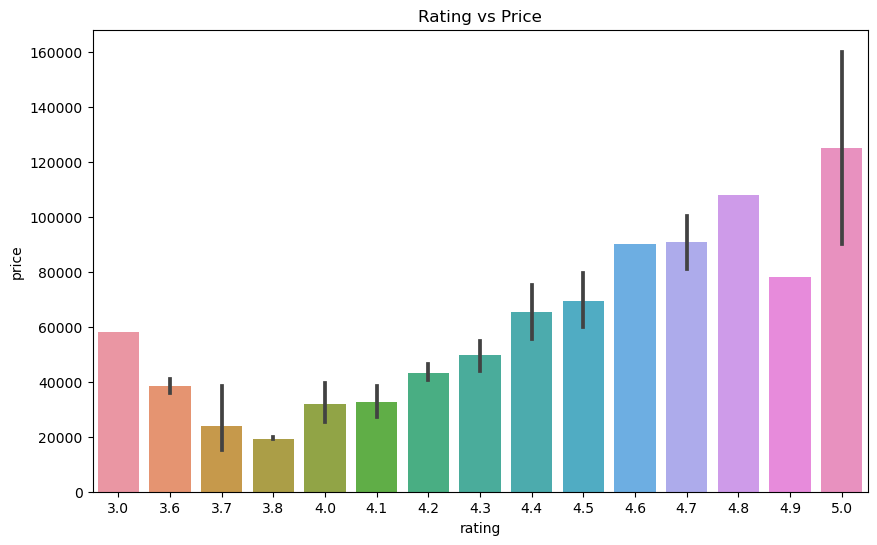

In [114]:
#Plotting Rating and price for laptops
plt.figure(figsize=(10,6))
sns.barplot(x=laptop_df['rating'],y=laptop_df['price'])
plt.title("Rating vs Price")

### Findings-
From the above graph we can see that price for the highest rating (5) laptop is higher than other.
People who wants the laptops with good rating and comparatively lover price can go with 4.9 rating laptops.
Cheapest laptops are with rating 3.8

### Box plot for price

Text(0.5, 1.0, 'Box Plot for price')

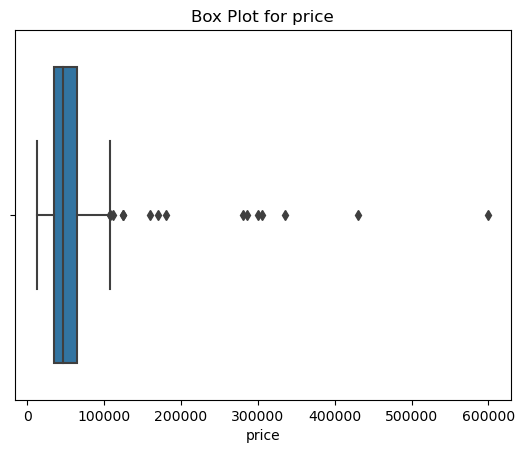

In [117]:
#simple box plot for price
sns.boxplot(x=laptop_df['price'])
plt.title("Box Plot for price")

### Findings-
The price column has many many outliers on with upper range. The graph is rightly skewed. 
